In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import itertools
from astropy.stats import sigma_clipped_stats

In [2]:
zps = pd.read_csv('./plots/zps_grouping_table.csv')
ois = pd.read_csv('./plots/ois_grouping_table.csv')
sps = pd.read_csv('./plots/sps_grouping_table.csv')
hot = pd.read_csv('./plots/hot_grouping_table.csv')

In [3]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [4]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [5]:
len(big_tab)

27

In [6]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [7]:
cols = hot.columns

test_cols = [col for col in cols if '_test_' in col]
test0_cols = [col for col in cols if '_test0_' in col]

group_cols = list(cols[1:4])

knn_cols = [col for col in cols if col.startswith('knn')]
rfo_cols = [col for col in cols if col.startswith('rfo')]
svc_cols = [col for col in cols if col.startswith('svc')]

f1_cols = [col for col in cols if 'f1' in col]
acc_cols = [col for col in cols if '_acc' in col]
bacc_cols = [col for col in cols if '_bacc' in col]
reca_cols = [col for col in cols if '_reca' in col]
prec_cols = [col for col in cols if '_prec' in col]
aprec_cols = [col for col in cols if '_aprec' in col]

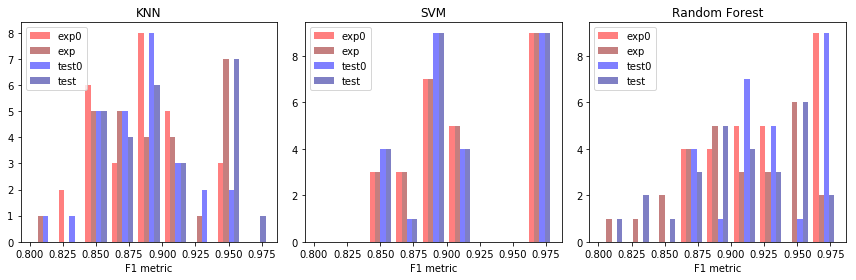

In [8]:
labels=['exp0', 'exp', 'test0', 'test']
colors=['red', 'darkred', 'blue', 'darkblue']

bins = np.arange(0.8, 1., 0.02)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('KNN')
plt.hist([hot['knn_exp0_f1'],hot['knn_exp_f1'],
          hot['knn_test0_f1'], hot['knn_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')

plt.subplot(132)
plt.title('SVM')
plt.hist([hot['svc_exp0_f1'],hot['svc_exp_f1'],
          hot['svc_test0_f1'], hot['svc_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')

plt.subplot(133)
plt.title('Random Forest')
plt.hist([hot['rfo_exp0_f1'],hot['rfo_exp_f1'],
          hot['rfo_test0_f1'], hot['rfo_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

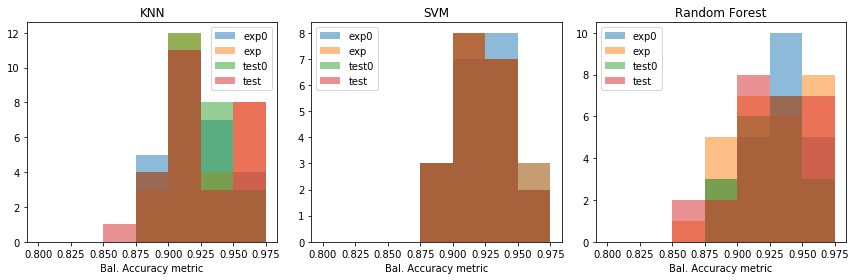

In [9]:
bins = np.arange(0.8, 1., 0.025)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('KNN')
plt.hist(hot['knn_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins, histtype='bar')
plt.hist(hot['knn_exp_bacc'],   alpha=0.5, label='exp',   bins=bins, histtype='bar')
plt.hist(hot['knn_test0_bacc'], alpha=0.5, label='test0', bins=bins, histtype='bar')
plt.hist(hot['knn_test_bacc'],  alpha=0.5, label='test',  bins=bins, histtype='bar')
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')

plt.subplot(132)
plt.title('SVM')
plt.hist(hot['svc_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins)
plt.hist(hot['svc_exp_bacc'],   alpha=0.5, label='exp',   bins=bins)
plt.hist(hot['svc_test0_bacc'], alpha=0.5, label='test0', bins=bins)
plt.hist(hot['svc_test_bacc'],  alpha=0.5, label='test',  bins=bins)
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')

plt.subplot(133)
plt.title('Random Forest')
plt.hist(hot['rfo_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins)
plt.hist(hot['rfo_exp_bacc'],   alpha=0.5, label='exp',   bins=bins)
plt.hist(hot['rfo_test0_bacc'], alpha=0.5, label='test0', bins=bins)
plt.hist(hot['rfo_test_bacc'],  alpha=0.5, label='test',  bins=bins)
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

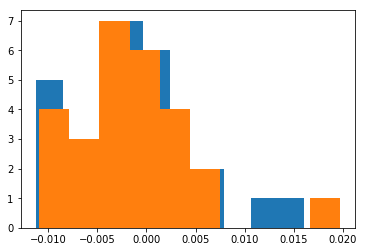

In [10]:
delta0_f1 = hot['knn_exp0_f1'] - hot['knn_test0_f1']
delta_f1 = hot['knn_exp_f1'] - hot['knn_test_f1']
delta0_bacc = hot['knn_exp0_bacc'] - hot['knn_test0_bacc']
delta_bacc = hot['knn_exp_bacc'] - hot['knn_test_bacc']

plt.hist(delta0_f1)
plt.hist(delta_f1)
plt.show()

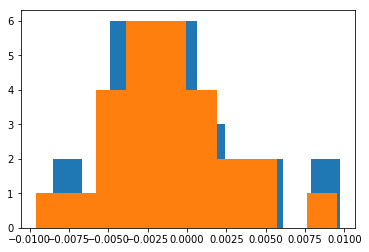

In [11]:
plt.hist(delta0_bacc)
plt.hist(delta_bacc)
plt.show()

In [12]:
non_matrix = [acol for acol in cols if not '_c' in acol]

In [13]:
f1 = [acol for acol in non_matrix if 'f1' in acol]

In [14]:
hot.columns

Index(['Unnamed: 0', 'm1_diam', 'exp_time', 'new_fwhm', 'knn_exp0_c00',
       'knn_exp0_c01', 'knn_exp0_c10', 'knn_exp0_c11', 'knn_exp0_bacc',
       'knn_exp0_acc',
       ...
       'svc_test_c00', 'svc_test_c01', 'svc_test_c10', 'svc_test_c11',
       'svc_test_bacc', 'svc_test_acc', 'svc_test_prec', 'svc_test_aprec',
       'svc_test_reca', 'svc_test_f1'],
      dtype='object', length=124)

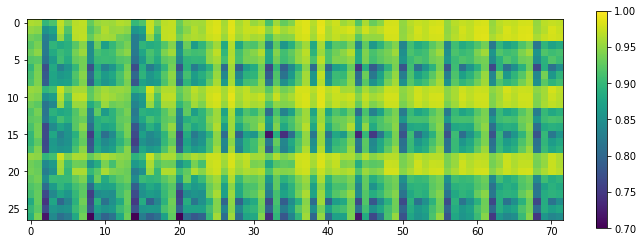

In [15]:
plt.figure(figsize=(12, 4))
plt.imshow(hot[non_matrix[4:]], vmin=0.7, vmax=1.)
plt.colorbar()

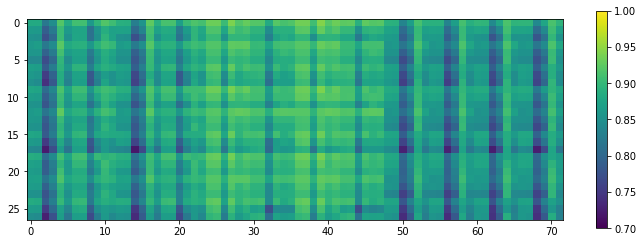

In [16]:
plt.figure(figsize=(12, 4))
plt.imshow(sps[non_matrix[4:]], vmin=0.7, vmax=1.)
plt.colorbar()

In [17]:
f1 = [col for col in b_f1_cols if '_test_' in col]

In [18]:
f1

['knn_test_f1_zps',
 'rfo_test_f1_zps',
 'svc_test_f1_zps',
 'knn_test_f1_ois',
 'rfo_test_f1_ois',
 'svc_test_f1_ois',
 'knn_test_f1',
 'rfo_test_f1',
 'svc_test_f1',
 'knn_test_f1_sps',
 'rfo_test_f1_sps',
 'svc_test_f1_sps']

In [19]:
group_cols

['m1_diam', 'exp_time', 'new_fwhm']

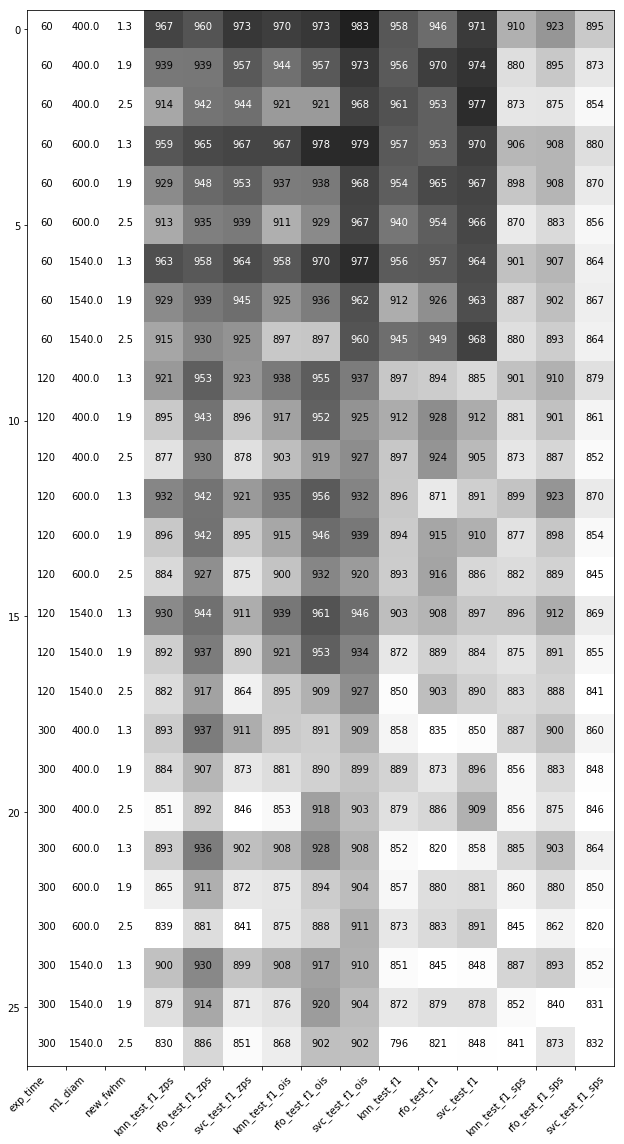

In [20]:
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[1], group_cols[0], group_cols[2]]+f1
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[1], group_cols[0], group_cols[2]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[f1].values)+0.05, vmax=1., interpolation='none', cmap=plt.cm.Greys)
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[f1].values) + np.min(big_tab[f1].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [21]:
#import seaborn as sns
#sns.set_context(font_scale=12)
#plt.rcParams["patch.force_edgecolor"] = True

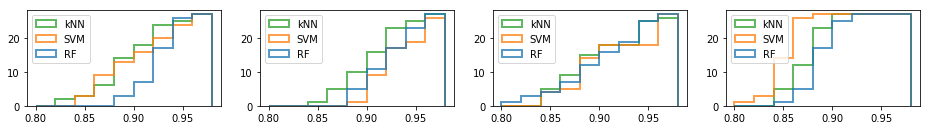

In [22]:
bins = np.arange(0.8, 1., 0.02)
plt.figure(figsize=(16, 6))

plt.subplot(341)
plt.hist([big_tab.rfo_test_f1_zps.values, big_tab.svc_test_f1_zps.values, big_tab.knn_test_f1_zps.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(342)
plt.hist([big_tab.rfo_test_f1_ois.values, big_tab.svc_test_f1_ois.values, big_tab.knn_test_f1_ois.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(343)
plt.hist([big_tab.rfo_test_f1.values, big_tab.svc_test_f1.values, big_tab.knn_test_f1.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(344)
plt.hist([big_tab.rfo_test_f1_sps.values, big_tab.svc_test_f1_sps.values, big_tab.knn_test_f1_sps.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

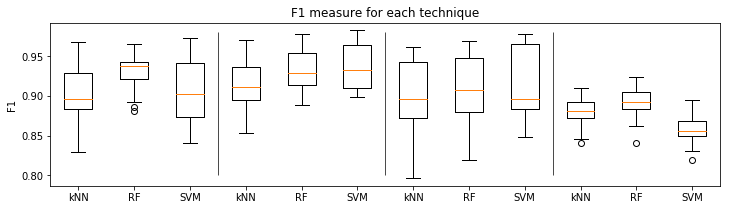

In [23]:
plt.figure(figsize=(12,3))
plt.title('F1 measure for each technique')
plt.boxplot(big_tab[f1].values)
plt.vlines(x=3.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.vlines(x=6.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.vlines(x=9.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)
plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

We only use the F1 value, and only on the test set...

Now we inspect the confusion matrices

In [24]:
cm_cols = [acol for acol in big_tab.columns if 'test_c' in acol]

In [25]:
knn_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('knn' in col)]].sum().values.reshape(2,2)
rfo_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
svc_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('svc' in col)]].sum().values.reshape(2,2)

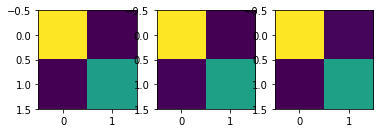

In [26]:
plt.subplot(131)
plt.imshow(knn_cms)
plt.subplot(132)
plt.imshow(rfo_cms)
plt.subplot(133)
plt.imshow(svc_cms)

In [27]:
zps_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms = big_tab[['rfo_test_c00', 'rfo_test_c01', 'rfo_test_c10', 'rfo_test_c11']].sum().values.reshape(2,2)
sps_cms = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

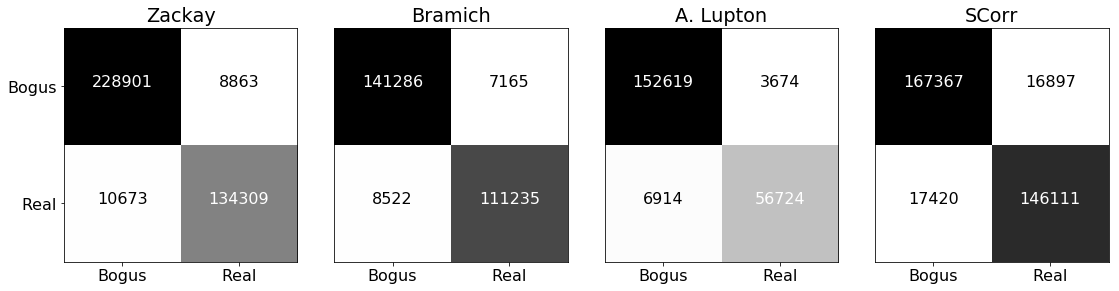

In [28]:
thresh=20000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [29]:
zps = pd.read_csv('./plots_full/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots_full/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots_full/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots_full/hot_grouping_table_rfo.csv')

In [30]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [31]:
len(big_tab)

27

In [32]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [33]:
cm_cols = [acol for acol in big_tab.columns if 'test_c' in acol]

In [34]:
zps_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms = big_tab[['rfo_test_c00', 'rfo_test_c01', 'rfo_test_c10', 'rfo_test_c11']].sum().values.reshape(2,2)
sps_cms = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

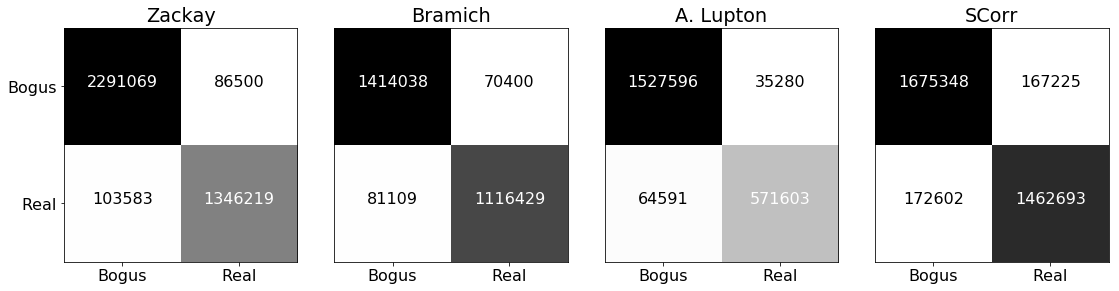

In [35]:
thresh=200000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [36]:
cm_cols_exp = [acol for acol in big_tab.columns if 'exp_c' in acol]

In [37]:
zps_cms_exp = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms_exp = big_tab[['rfo_exp_c00', 'rfo_exp_c01', 'rfo_exp_c10', 'rfo_exp_c11']].sum().values.reshape(2,2)
sps_cms_exp = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms_exp = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

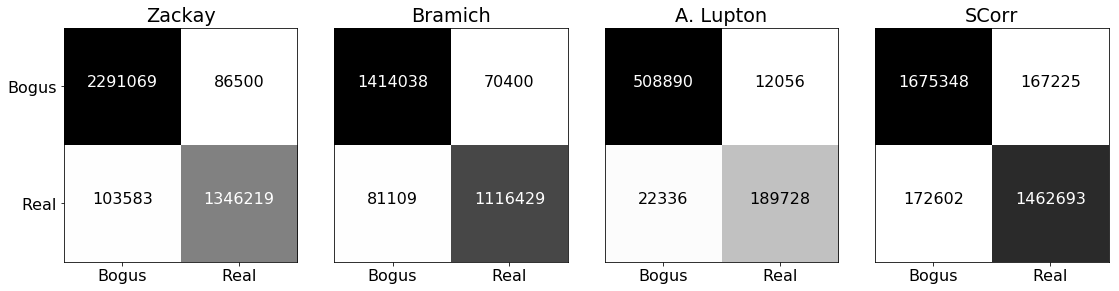

In [38]:
thresh=200000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms_exp
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms_exp
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms_exp
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms_exp
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [39]:
zps_cm_tot = zps_cms + zps_cms_exp
sps_cm_tot = sps_cms + sps_cms_exp
ois_cm_tot = ois_cms + ois_cms_exp
hot_cm_tot = hot_cms + hot_cms_exp

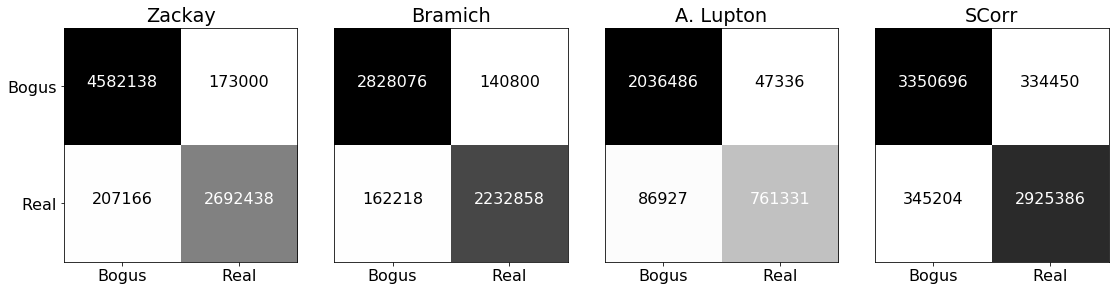

In [40]:
thresh=500000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cm_tot
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cm_tot
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cm_tot
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cm_tot
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

The true metric to evaluate is this:

* TP = Reals as Reals as come from ML

* FN = Reals as Bogus as comes from ML + sources lost in DIA

* FP = Bogus as Reals

* Precision = TP/(TP + FP)

* Recall = TP/(TP + FN)

* F1 = 2 PR/(P+R)

Zackay

In [41]:
FN_dia = [1339719, 1676071, 1301542, 1092394]

In [42]:
dat = zps_cm_tot
i = 0

In [43]:
def final_metric(dat, i, method='Zackay'):
    TP = dat[1, 1]
    FN = dat[1, 0] + FN_dia[i]
    FP = dat[0, 1]
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    F1 = 2*P*R/(P+R)
    print(method+' Statistics\n')
    print('TP = {}'.format(TP))
    print('FN = {}'.format(FN))
    print('Total = {}'.format(FN+TP))
    
    print('FP = {}'.format(FP))
    print('P = {}'.format(np.round(P, 3)))
    print('R = {}'.format(np.round(R, 3)))
    print('F1 = {}'.format(np.round(F1, 3)))
    return[TP, FN, FP, P, R, F1]

In [44]:
for i_dat, dat in enumerate([[zps_cm_tot, 'Zackay'], [ois_cm_tot, 'Bramich'], [hot_cm_tot, 'ALupton'], [sps_cm_tot, 'SCorr']]):
    final_metric(dat[0], i_dat, method=dat[1])
    print('#=============================#\n')

Zackay Statistics

TP = 2692438.0
FN = 1546885.0
Total = 4239323.0
FP = 173000.0
P = 0.94
R = 0.635
F1 = 0.758
#=============================#

Bramich Statistics

TP = 2232858.0
FN = 1838289.0
Total = 4071147.0
FP = 140800.0
P = 0.941
R = 0.548
F1 = 0.693
#=============================#

ALupton Statistics

TP = 761331.0
FN = 1388469.0
Total = 2149800.0
FP = 47336.0
P = 0.941
R = 0.354
F1 = 0.515
#=============================#

SCorr Statistics

TP = 2925386.0
FN = 1437598.0
Total = 4362984.0
FP = 334450.0
P = 0.897
R = 0.671
F1 = 0.768
#=============================#



# Working with the new ml rundowns from clemente

In [166]:
zps = pd.read_csv('./plots/new_ml_zps/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots/new_ml_ois/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots/new_ml_sps/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots/new_ml_hot/hot_grouping_table_rfo.csv')

In [167]:
zps.columns

Index(['Unnamed: 0', 'm1_diam', 'exp_time', 'new_fwhm', 'knn_exp0_c00',
       'knn_exp0_c01', 'knn_exp0_c10', 'knn_exp0_c11', 'knn_exp0_bacc',
       'knn_exp0_acc',
       ...
       'svc_fcm_00', 'svc_fcm_01', 'svc_fcm_10', 'svc_fcm_11', 'svc_fcm_TP',
       'svc_fcm_FP', 'svc_fcm_FN', 'svc_fcm_P', 'svc_fcm_R', 'svc_fcm_F1'],
      dtype='object', length=184)

In [168]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [169]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [170]:
len(big_tab)

27

In [171]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [172]:
fcm_F1 = [col for col in cols if 'cm_F1' in col]

In [173]:
cols = hot.columns

test_cols = [col for col in cols if '_test_' in col]
test0_cols = [col for col in cols if '_test0_' in col]

group_cols = list(cols[1:4])

knn_cols = [col for col in cols if col.startswith('knn')]
rfo_cols = [col for col in cols if col.startswith('rfo')]
svc_cols = [col for col in cols if col.startswith('svc')]

f1_cols = [col for col in cols if 'f1' in col]
acc_cols = [col for col in cols if '_acc' in col]
bacc_cols = [col for col in cols if '_bacc' in col]
reca_cols = [col for col in cols if '_reca' in col]
prec_cols = [col for col in cols if '_prec' in col]
aprec_cols = [col for col in cols if '_aprec' in col]

In [174]:
#sns.set_context(font_scale=8)

vmax=0.7897248517802745
vmin=0.45333947437680944


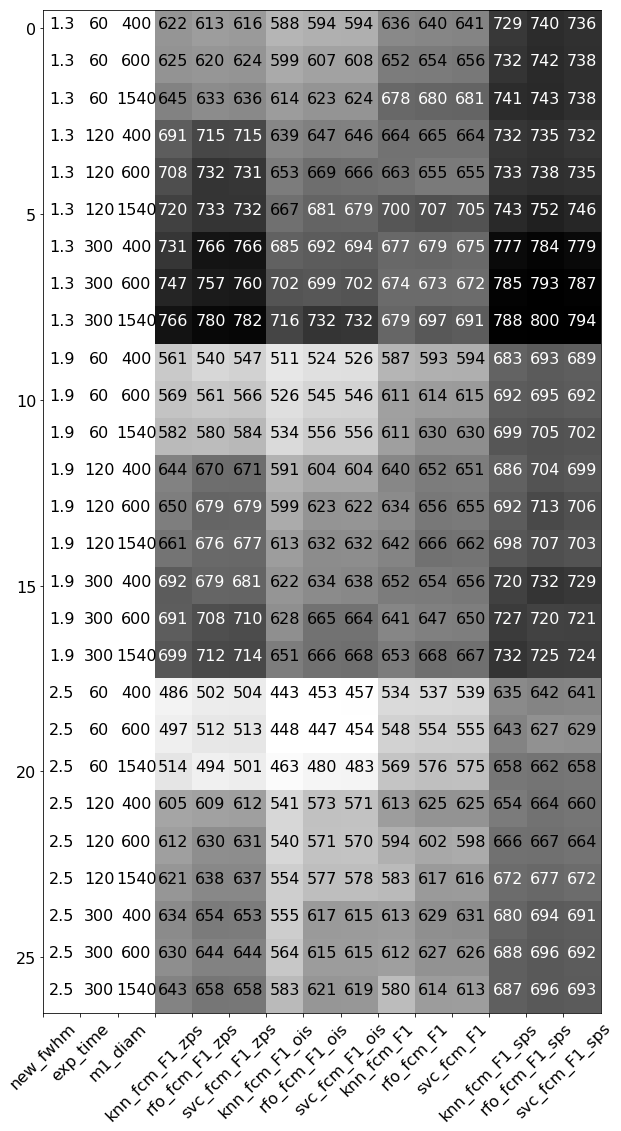

In [175]:
vals = fcm_F1 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [176]:
diaf_FN_hot = (big_tab['knn_fcm_FN']-big_tab['knn_fcm_10'])
diaf_FN_zps = (big_tab['knn_fcm_FN_zps']-big_tab['knn_fcm_10_zps'])
diaf_FN_sps = (big_tab['knn_fcm_FN_sps']-big_tab['knn_fcm_10_sps'])
diaf_FN_ois = (big_tab['knn_fcm_FN_ois']-big_tab['knn_fcm_10_ois'])

In [177]:
diaf_TP_hot = (big_tab['knn_fcm_11']+big_tab['knn_fcm_10'])
diaf_TP_zps = (big_tab['knn_fcm_11_zps']+big_tab['knn_fcm_10_zps'])
diaf_TP_sps = (big_tab['knn_fcm_11_sps']+big_tab['knn_fcm_10_sps'])
diaf_TP_ois = (big_tab['knn_fcm_11_ois']+big_tab['knn_fcm_10_ois'])

In [178]:
diaf_FP_hot = (big_tab['knn_fcm_00']+big_tab['knn_fcm_01'])
diaf_FP_zps = (big_tab['knn_fcm_00_zps']+big_tab['knn_fcm_01_zps'])
diaf_FP_sps = (big_tab['knn_fcm_00_sps']+big_tab['knn_fcm_01_sps'])
diaf_FP_ois = (big_tab['knn_fcm_00_ois']+big_tab['knn_fcm_01_ois'])

In [179]:
diaf_P_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FP_hot)
diaf_P_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FP_zps)
diaf_P_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FP_sps)
diaf_P_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FP_ois)

In [180]:
diaf_R_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FN_hot)
diaf_R_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FN_zps)
diaf_R_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FN_sps)
diaf_R_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FN_ois)

In [181]:
diaf_F1_hot = 2 * diaf_P_hot * diaf_R_hot /(diaf_P_hot+diaf_R_hot)
diaf_F1_zps = 2 * diaf_P_zps * diaf_R_zps /(diaf_P_zps+diaf_R_zps)
diaf_F1_sps = 2 * diaf_P_sps * diaf_R_sps /(diaf_P_sps+diaf_R_sps)
diaf_F1_ois = 2 * diaf_P_ois * diaf_R_ois /(diaf_P_ois+diaf_R_ois)

In [182]:
print(np.sum(diaf_TP_hot), np.sum(diaf_FN_hot), np.sum(diaf_FP_hot), np.sum(diaf_TP_hot)+np.sum(diaf_FN_hot))
print(np.sum(diaf_TP_zps), np.sum(diaf_FN_zps), np.sum(diaf_FP_zps), np.sum(diaf_TP_zps)+np.sum(diaf_FN_zps))
print(np.sum(diaf_TP_sps), np.sum(diaf_FN_sps), np.sum(diaf_FP_sps), np.sum(diaf_TP_sps)+np.sum(diaf_FN_sps))
print(np.sum(diaf_TP_ois), np.sum(diaf_FN_ois), np.sum(diaf_FP_ois), np.sum(diaf_TP_ois)+np.sum(diaf_FN_ois))

848258.0 764233.0 2083822.0 1612491.0
483696.0 334930.0 792091.0 818626.0
2180390.0 1092394.0 2456754.0 3272784.0
1596713.0 1676071.0 1979241.0 3272784.0


In [209]:
tt = big_tab[pl_cols]

In [234]:
ff = (tt['m1_diam']>1500)&(tt['exp_time']<70)#&(tt['new_fwhm']==1.9)

In [237]:
eabalike.values.ravel()

array([], dtype=float64)

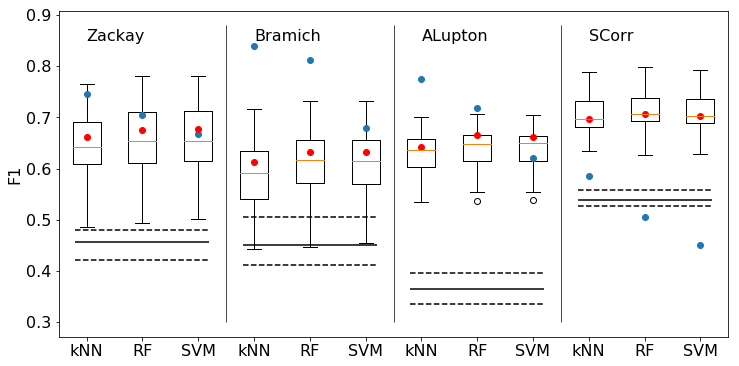

In [239]:
plt.figure(figsize=(12,6))
#plt.title('F1 measure for each technique')
plt.boxplot(big_tab[vals].values)
realdataF1 = [0.746, 0.704, 0.668, 0.840, 0.813, 0.680, 0.775, 0.719, 0.621, 0.585, 0.506, 0.450]
plt.plot(np.arange(12)+1.0, realdataF1, 'o')

ff = (tt['m1_diam']>1500)&(tt['exp_time']>70)&(tt['exp_time']<130)&(tt['new_fwhm']>1.8)&(tt['new_fwhm']<2.0)
eabalike = tt.loc[ff]
plt.plot(np.arange(12)+1.0, eabalike.values.ravel()[-12:], 'ro')


plt.hlines(y=np.median(diaf_F1_zps), xmin=0.8, xmax=3.2)
plt.hlines(y=np.percentile(diaf_F1_zps, q=[25, 75]), xmin=0.8, xmax=3.2, linestyles='--')
#realdata
#plt.hlines(y=0.15, xmin=0.8, xmax=3.2, linestyles='-')
plt.vlines(x=3.5, ymin=0.3, ymax=0.88, lw=0.7)


plt.hlines(y=np.median(diaf_F1_ois), xmin=3.8, xmax=6.2)
plt.hlines(y=np.percentile(diaf_F1_ois, q=[25, 75]), xmin=3.8, xmax=6.2, linestyles='--')
plt.vlines(x=6.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_hot), xmin=6.8, xmax=9.2)
plt.hlines(y=np.percentile(diaf_F1_hot, q=[25, 75]), xmin=6.8, xmax=9.2, linestyles='--')
plt.vlines(x=9.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_sps), xmin=9.8, xmax=12.2)
plt.hlines(y=np.percentile(diaf_F1_sps, q=[25, 75]), xmin=9.8, xmax=12.2, linestyles='--')

plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)

plt.text(s='Zackay', x=1, y=0.85)
plt.text(s='Bramich', x=4, y=0.85)
plt.text(s='ALupton', x=7, y=0.85)
plt.text(s='SCorr', x=10, y=0.85)

plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

In [152]:
big_tab['knn_F1_rate_zps'] = big_tab['knn_fcm_F1_zps']/diaf_F1_zps
big_tab['svc_F1_rate_zps'] = big_tab['svc_fcm_F1_zps']/diaf_F1_zps
big_tab['rfo_F1_rate_zps'] = big_tab['rfo_fcm_F1_zps']/diaf_F1_zps

big_tab['knn_F1_rate_sps'] = big_tab['knn_fcm_F1_sps']/diaf_F1_sps
big_tab['svc_F1_rate_sps'] = big_tab['svc_fcm_F1_sps']/diaf_F1_sps
big_tab['rfo_F1_rate_sps'] = big_tab['rfo_fcm_F1_sps']/diaf_F1_sps

big_tab['knn_F1_rate_hot'] = big_tab['knn_fcm_F1']/diaf_F1_hot
big_tab['svc_F1_rate_hot'] = big_tab['svc_fcm_F1']/diaf_F1_hot
big_tab['rfo_F1_rate_hot'] = big_tab['rfo_fcm_F1']/diaf_F1_hot

big_tab['knn_F1_rate_ois'] = big_tab['knn_fcm_F1_ois']/diaf_F1_ois
big_tab['svc_F1_rate_ois'] = big_tab['svc_fcm_F1_ois']/diaf_F1_ois
big_tab['rfo_F1_rate_ois'] = big_tab['rfo_fcm_F1_ois']/diaf_F1_ois

vmax=2.244123510179283
vmin=1.1473163922015808


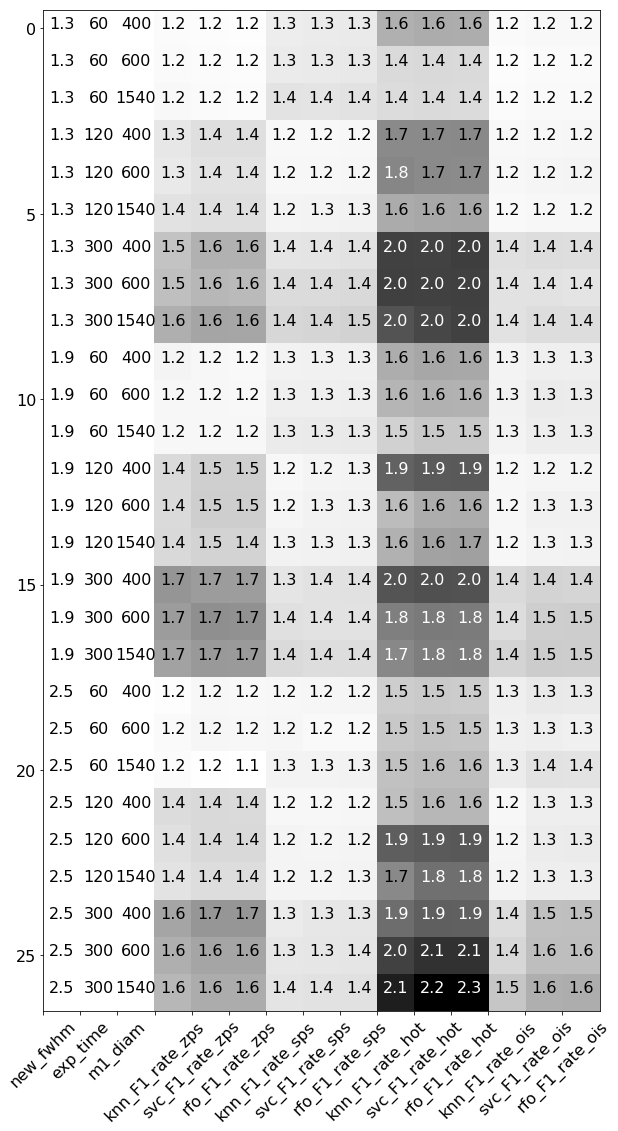

In [153]:
vals = [acol for acol in big_tab.columns if 'F1_rate' in acol] 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.2'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap_ratio.pdf', format='pdf', dpi=780)

In [3]:
from joblib import load, dump

In [9]:
zps_rfsigs = load('./plots/new_ml_zps_parallel/rforest_sigs_zps.joblib')
ois_rfsigs = load('./plots/new_ml_ois_parallel/rforest_sigs_ois.joblib')
sps_rfsigs = load('./plots/new_ml_sps_parallel/rforest_sigs_sps.joblib')
hot_rfsigs = load('./plots/new_ml_hot_parallel/rforest_sigs_hot.joblib')

In [15]:
def franking(rfsigs):
    counts = pd.Series(np.zeros_like(rfsigs[0].values), 
                       index=rfsigs[0].index, dtype=float)
    for asig in rfsigs:
        asig = asig.loc[~asig.isnull()]
        sel = asig.dropna()
        #for anindex in sel.loc[sel].index:
        for anindex in sel.index:
            if np.isfinite(asig[anindex]):
                if anindex not in counts.index:
                    counts[anindex] = 0
                else:
                    counts[anindex] += asig[anindex]
    return counts/27.

In [16]:
franking(sps_rfsigs)

MAG_APER             3.195950
PEAK_CENTROID       21.191892
RATIO                0.478224
ROUNDNESS           13.537430
Random               0.000000
SN                   1.137405
cflux                3.357236
cxx                  2.310176
cxy                  0.217627
cyy                  2.102507
flag                 8.991550
mag_iso              1.112235
mean_goyet           1.158184
mean_offset          4.269128
new_back_sbright     2.673843
npix                 2.981170
px_scale             7.578848
ref_back_sbright     1.481966
ref_fwhm             1.488289
slope                1.453325
theta                0.153966
thresh              14.518705
xmin_col             0.513909
xy                   0.251815
y2                   0.402494
ymin                 0.570068
MU                   1.307086
x2                   0.154640
cpeak                0.000000
dtype: float64

In [17]:
counts = franking(zps_rfsigs)

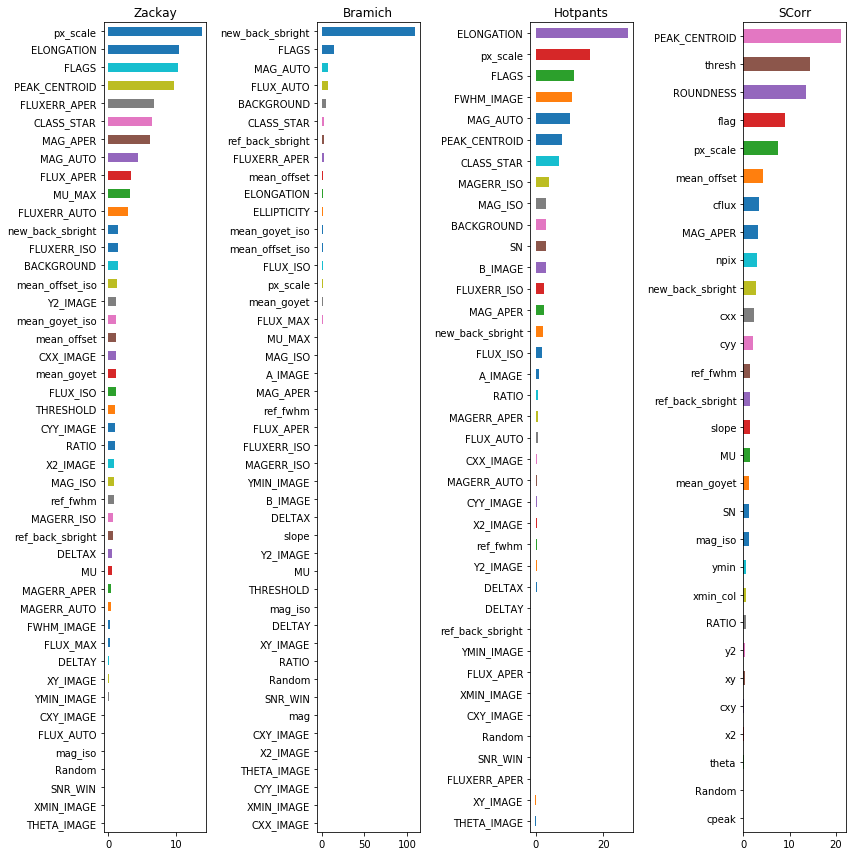

In [18]:
top = 0
plt.figure(figsize=(12,12))
plt.subplot(141)
counts = franking(zps_rfsigs)
counts.sort_values().iloc[-top:].plot.barh(title='Zackay')

plt.subplot(142)
counts = franking(ois_rfsigs)
counts.sort_values().iloc[-top:].plot.barh(title='Bramich')

plt.subplot(143)
counts = franking(hot_rfsigs)
counts.sort_values().iloc[-top:].plot.barh(title='Hotpants')

plt.subplot(144)
counts = franking(sps_rfsigs)
counts.sort_values().iloc[-top:].plot.barh(title='SCorr')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ranking_rfo.png')

In [ ]:
plt.figu

### For KNN

In [22]:
zps_knsigs = load('./plots/new_ml_zps_parallel/knn_fsel_zps.joblib')
ois_knsigs = load('./plots/new_ml_ois_parallel/knn_fsel_ois.joblib')
sps_knsigs = load('./plots/new_ml_sps_parallel/knn_fsel_sps.joblib')
hot_knsigs = load('./plots/new_ml_hot_parallel/knn_fsel_hot.joblib')

In [23]:
def franking(fsel):
    sels = list(itertools.chain(*fsel))
    #print(sels)
    counts = pd.Series(np.zeros(len(np.unique(sels))), index=np.unique(sels), dtype=int)
    for asel in sels:
        counts[asel] += 1
    return counts

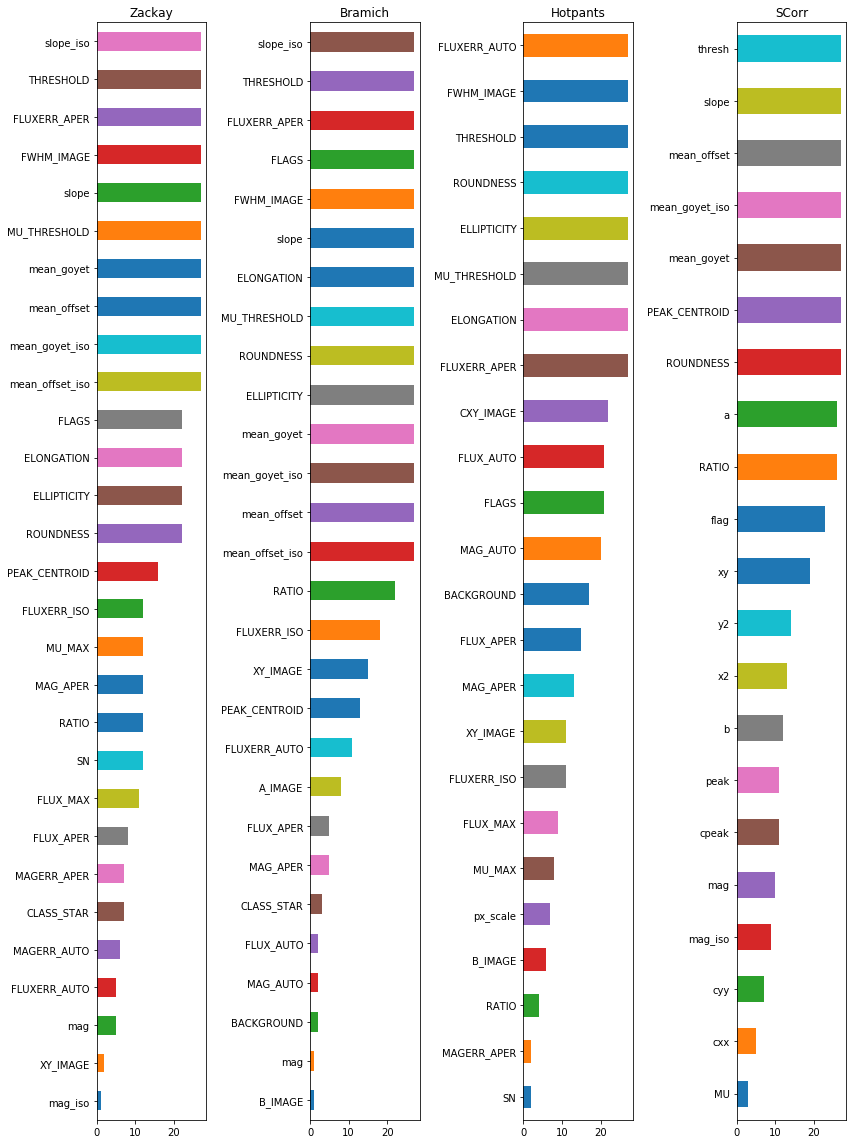

In [24]:
plt.figure(figsize=(12, 16))
plt.subplot(141)
counts = franking(zps_knsigs)
counts.sort_values().plot.barh(title='Zackay')

plt.subplot(142)
counts = franking(ois_knsigs)
counts.sort_values().plot.barh(title='Bramich')

plt.subplot(143)
counts = franking(hot_knsigs)
counts.sort_values().plot.barh(title='Hotpants')

plt.subplot(144)
counts = franking(sps_knsigs)
counts.sort_values().plot.barh(title='SCorr')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ranking_knn.png')

### For SVM

In [25]:
zps_knsigs = load('./plots/new_ml_zps_parallel/svm_fsel_zps.joblib')
ois_knsigs = load('./plots/new_ml_ois_parallel/svm_fsel_ois.joblib')
sps_knsigs = load('./plots/new_ml_sps_parallel/svm_fsel_sps.joblib')
hot_knsigs = load('./plots/new_ml_hot_parallel/svm_fsel_hot.joblib')

In [26]:
def franking(fsel):
    sels = list(itertools.chain(*fsel))
    #print(sels)
    counts = pd.Series(np.zeros(len(np.unique(sels))), index=np.unique(sels), dtype=int)
    for asel in sels:
        counts[asel] += 1
    return counts

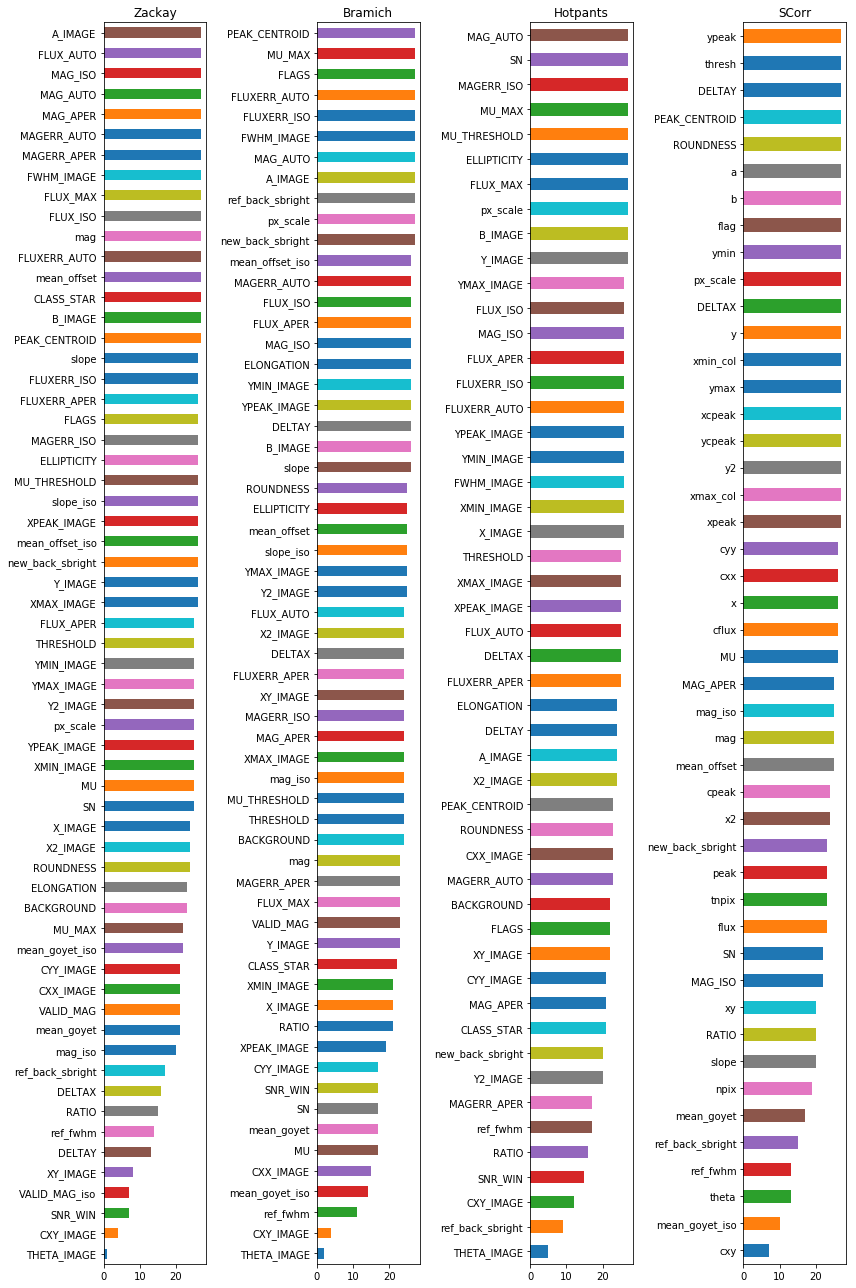

In [27]:
plt.figure(figsize=(12,18))
plt.subplot(141)
counts = franking(zps_knsigs)
counts.sort_values().plot.barh(title='Zackay')

plt.subplot(142)
counts = franking(ois_knsigs)
counts.sort_values().plot.barh(title='Bramich')

plt.subplot(143)
counts = franking(hot_knsigs)
counts.sort_values().plot.barh(title='Hotpants')

plt.subplot(144)
counts = franking(sps_knsigs)
counts.sort_values().plot.barh(title='SCorr')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ranking_svm.png')

# Start from here

## Clemente parallel. With the IDs!

# Working with the new ml rundowns from clemente

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import itertools
from astropy.stats import sigma_clipped_stats

In [348]:
zps = pd.read_csv('./plots/new_ml_zps_parallel/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots/new_ml_ois_parallel/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots/new_ml_sps_parallel/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots/new_ml_hot_parallel/hot_grouping_table_rfo.csv')

In [349]:
zps.columns

Index(['Unnamed: 0', 'm1_diam', 'exp_time', 'new_fwhm', 'knn_exp0_c00',
       'knn_exp0_c01', 'knn_exp0_c10', 'knn_exp0_c11', 'knn_exp0_bacc',
       'knn_exp0_acc',
       ...
       'svc_fcm_00', 'svc_fcm_01', 'svc_fcm_10', 'svc_fcm_11', 'svc_fcm_TP',
       'svc_fcm_FP', 'svc_fcm_FN', 'svc_fcm_P', 'svc_fcm_R', 'svc_fcm_F1'],
      dtype='object', length=184)

In [350]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [351]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [352]:
len(big_tab)

27

In [353]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [354]:
fcm_F1 = [col for col in cols if 'cm_F1' in col]

In [355]:
cols = hot.columns

test_cols = [col for col in cols if '_test_' in col]
test0_cols = [col for col in cols if '_test0_' in col]

group_cols = list(cols[1:4])

knn_cols = [col for col in cols if col.startswith('knn')]
rfo_cols = [col for col in cols if col.startswith('rfo')]
svc_cols = [col for col in cols if col.startswith('svc')]

f1_cols = [col for col in cols if 'f1' in col]
acc_cols = [col for col in cols if '_acc' in col]
bacc_cols = [col for col in cols if '_bacc' in col]
reca_cols = [col for col in cols if '_reca' in col]
prec_cols = [col for col in cols if '_prec' in col]
aprec_cols = [col for col in cols if '_aprec' in col]

In [356]:
#sns.set_context(font_scale=8)

vmax=0.8382796054989811
vmin=0.4517752404638762


MemoryError: 

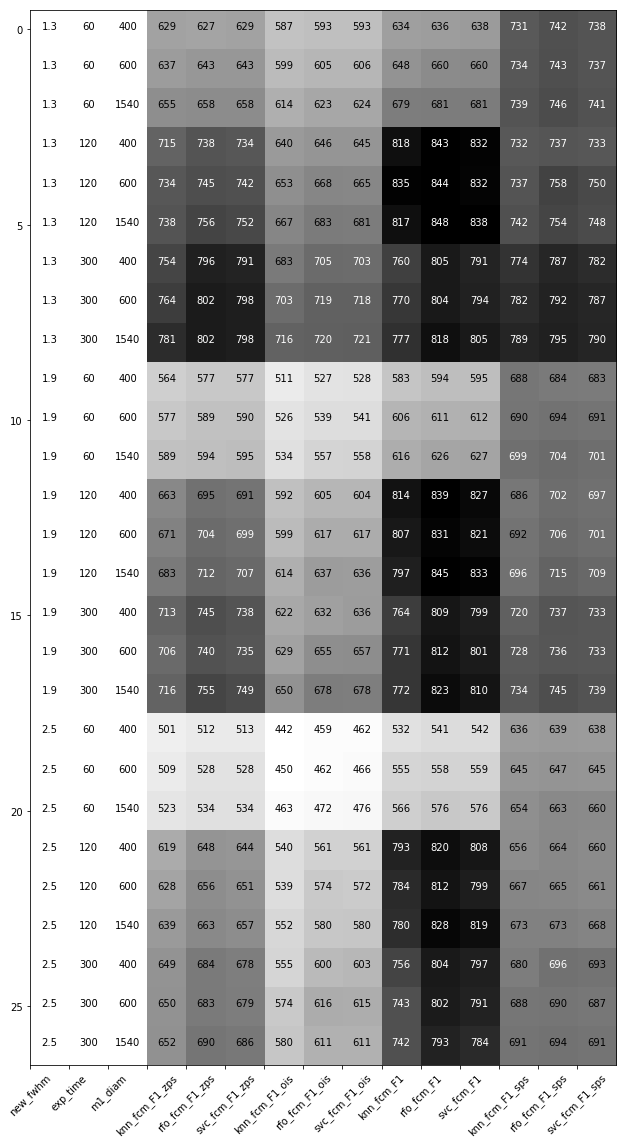

In [357]:
vals = fcm_F1 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
#plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [ ]:
diaf_FN_hot = (big_tab['knn_fcm_FN']-big_tab['knn_fcm_10'])
diaf_FN_zps = (big_tab['knn_fcm_FN_zps']-big_tab['knn_fcm_10_zps'])
diaf_FN_sps = (big_tab['knn_fcm_FN_sps']-big_tab['knn_fcm_10_sps'])
diaf_FN_ois = (big_tab['knn_fcm_FN_ois']-big_tab['knn_fcm_10_ois'])

In [ ]:
diaf_TP_hot = (big_tab['knn_fcm_11']+big_tab['knn_fcm_10'])
diaf_TP_zps = (big_tab['knn_fcm_11_zps']+big_tab['knn_fcm_10_zps'])
diaf_TP_sps = (big_tab['knn_fcm_11_sps']+big_tab['knn_fcm_10_sps'])
diaf_TP_ois = (big_tab['knn_fcm_11_ois']+big_tab['knn_fcm_10_ois'])

In [ ]:
diaf_FP_hot = (big_tab['knn_fcm_00']+big_tab['knn_fcm_01'])
diaf_FP_zps = (big_tab['knn_fcm_00_zps']+big_tab['knn_fcm_01_zps'])
diaf_FP_sps = (big_tab['knn_fcm_00_sps']+big_tab['knn_fcm_01_sps'])
diaf_FP_ois = (big_tab['knn_fcm_00_ois']+big_tab['knn_fcm_01_ois'])

In [ ]:
diaf_P_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FP_hot)
diaf_P_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FP_zps)
diaf_P_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FP_sps)
diaf_P_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FP_ois)

In [ ]:
diaf_R_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FN_hot)
diaf_R_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FN_zps)
diaf_R_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FN_sps)
diaf_R_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FN_ois)

In [ ]:
diaf_F1_hot = 2 * diaf_P_hot * diaf_R_hot /(diaf_P_hot+diaf_R_hot)
diaf_F1_zps = 2 * diaf_P_zps * diaf_R_zps /(diaf_P_zps+diaf_R_zps)
diaf_F1_sps = 2 * diaf_P_sps * diaf_R_sps /(diaf_P_sps+diaf_R_sps)
diaf_F1_ois = 2 * diaf_P_ois * diaf_R_ois /(diaf_P_ois+diaf_R_ois)

In [ ]:
print(np.sum(diaf_TP_hot), np.sum(diaf_FN_hot), np.sum(diaf_FP_hot), np.sum(diaf_TP_hot)+np.sum(diaf_FN_hot))
print(np.sum(diaf_TP_zps), np.sum(diaf_FN_zps), np.sum(diaf_FP_zps), np.sum(diaf_TP_zps)+np.sum(diaf_FN_zps))
print(np.sum(diaf_TP_sps), np.sum(diaf_FN_sps), np.sum(diaf_FP_sps), np.sum(diaf_TP_sps)+np.sum(diaf_FN_sps))
print(np.sum(diaf_TP_ois), np.sum(diaf_FN_ois), np.sum(diaf_FP_ois), np.sum(diaf_TP_ois)+np.sum(diaf_FN_ois))

In [ ]:
tt = big_tab[pl_cols]

In [ ]:
plt.figure(figsize=(12,6))
#plt.title('F1 measure for each technique')
plt.boxplot(big_tab[vals].values)
realdataF1 = [0.746, 0.704, 0.668, 0.840, 0.813, 0.680, 0.775, 0.719, 0.621, 0.585, 0.506, 0.450]
plt.plot(np.arange(12)+1.0, realdataF1, 'o')

ff = (tt['m1_diam']>1500)&(tt['exp_time']>70)&(tt['exp_time']<130)&(tt['new_fwhm']>1.8)&(tt['new_fwhm']<2.0)
eabalike = tt.loc[ff]
plt.plot(np.arange(12)+1.0, eabalike.values.ravel()[-12:], 'ro')

plt.hlines(y=np.median(diaf_F1_zps), xmin=0.8, xmax=3.2)
plt.hlines(y=np.percentile(diaf_F1_zps, q=[25, 75]), xmin=0.8, xmax=3.2, linestyles='--')
#realdata
#plt.hlines(y=0.15, xmin=0.8, xmax=3.2, linestyles='-')
plt.vlines(x=3.5, ymin=0.3, ymax=0.88, lw=0.7)


plt.hlines(y=np.median(diaf_F1_ois), xmin=3.8, xmax=6.2)
plt.hlines(y=np.percentile(diaf_F1_ois, q=[25, 75]), xmin=3.8, xmax=6.2, linestyles='--')
plt.vlines(x=6.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_hot), xmin=6.8, xmax=9.2)
plt.hlines(y=np.percentile(diaf_F1_hot, q=[25, 75]), xmin=6.8, xmax=9.2, linestyles='--')
plt.vlines(x=9.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_sps), xmin=9.8, xmax=12.2)
plt.hlines(y=np.percentile(diaf_F1_sps, q=[25, 75]), xmin=9.8, xmax=12.2, linestyles='--')

plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)

plt.text(s='Zackay', x=1, y=0.85)
plt.text(s='Bramich', x=4, y=0.85)
plt.text(s='ALupton', x=7, y=0.85)
plt.text(s='SCorr', x=10, y=0.85)

plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

In [ ]:
big_tab['knn_F1_rate_zps'] = big_tab['knn_fcm_F1_zps']/diaf_F1_zps
big_tab['svc_F1_rate_zps'] = big_tab['svc_fcm_F1_zps']/diaf_F1_zps
big_tab['rfo_F1_rate_zps'] = big_tab['rfo_fcm_F1_zps']/diaf_F1_zps

big_tab['knn_F1_rate_sps'] = big_tab['knn_fcm_F1_sps']/diaf_F1_sps
big_tab['svc_F1_rate_sps'] = big_tab['svc_fcm_F1_sps']/diaf_F1_sps
big_tab['rfo_F1_rate_sps'] = big_tab['rfo_fcm_F1_sps']/diaf_F1_sps

big_tab['knn_F1_rate_hot'] = big_tab['knn_fcm_F1']/diaf_F1_hot
big_tab['svc_F1_rate_hot'] = big_tab['svc_fcm_F1']/diaf_F1_hot
big_tab['rfo_F1_rate_hot'] = big_tab['rfo_fcm_F1']/diaf_F1_hot

big_tab['knn_F1_rate_ois'] = big_tab['knn_fcm_F1_ois']/diaf_F1_ois
big_tab['svc_F1_rate_ois'] = big_tab['svc_fcm_F1_ois']/diaf_F1_ois
big_tab['rfo_F1_rate_ois'] = big_tab['rfo_fcm_F1_ois']/diaf_F1_ois

In [ ]:
vals = [acol for acol in big_tab.columns if 'F1_rate' in acol] 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.2'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap_ratio.svg', format='svg', dpi=780)

## Feature Selection

For RF

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import custom_funs as cf
%matplotlib inline

In [2]:
from importlib import reload
reload(cf)

<module 'custom_funs' from '/home/bos0109/RBMLearning/piramid/custom_funs.py'>

In [3]:
from joblib import load, dump

In [4]:
zps_rfsigs = load('./plots/new_ml_zps_parallel/rforest_sigs_zps.joblib')
ois_rfsigs = load('./plots/new_ml_ois_parallel/rforest_sigs_ois.joblib')
sps_rfsigs = load('./plots/new_ml_sps_parallel/rforest_sigs_sps.joblib')
hot_rfsigs = load('./plots/new_ml_hot_parallel/rforest_sigs_hot.joblib')

In [5]:
def franking(rfsigs, sps=False):
    if sps:
        index = [cf.transl[lab] if lab in cf.transl.keys() else lab for lab in sps_rfsigs[0].index]
        counts = pd.Series(np.zeros_like(rfsigs[0].values), 
                       index=index, dtype=float)
    else:
        counts = pd.Series(np.zeros_like(rfsigs[0].values), 
                       index=rfsigs[0].index, dtype=float)
    for asig in rfsigs:
        asig = asig.loc[~asig.isnull()]
        sel = asig.dropna()
        #for anindex in sel.loc[sel].index:
        for anindex in sel.index:
            val = asig[anindex]
            if np.isfinite(val):
                if sps:
                    if anindex in cf.transl.keys():
                        anindex = cf.transl[anindex]
                if anindex not in counts.index:
                    #print(anindex)
                    counts[anindex] = val
                else:
                    counts[anindex] += val
    droppable = ['px_scale', 'new_back_sbright', 'slope', 'mean_goyet', 
                 'ref_back_sbright', 'Random', 'mean_offset', 'mean_goyet_iso',
                 'mean_offset_iso']
    for aname in droppable:
        try: counts = counts.drop(aname)
        except: continue
    return counts/27.

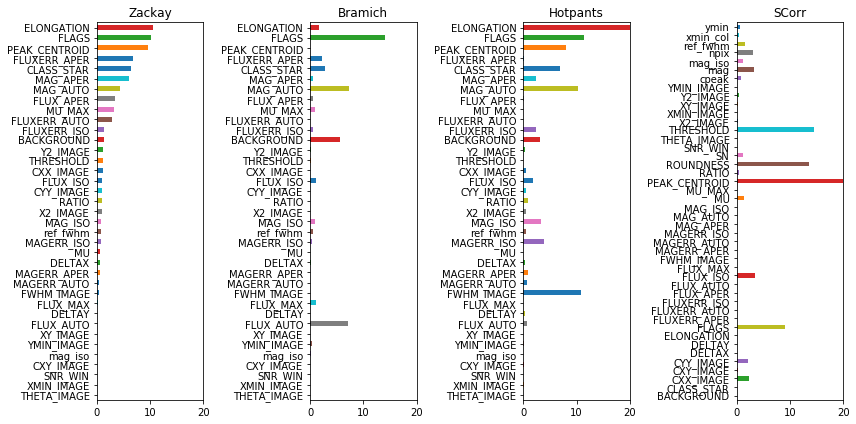

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(141)
counts = franking(zps_rfsigs)
counts.sort_values(ascending=True).plot.barh(title='Zackay')
plt.xlim(0, 20)
c1 = counts.sort_values(ascending=True).index

plt.subplot(142)
counts = franking(ois_rfsigs)
counts.reindex(list(c1)).plot.barh(title='Bramich')
plt.xlim(0, 20)

plt.subplot(143)
counts = franking(hot_rfsigs)
counts.reindex(list(c1)).plot.barh(title='Hotpants')
plt.xlim(0, 20)

plt.subplot(144)
counts = franking(sps_rfsigs, sps=True)
counts.reindex(np.unique(list(c1)+list(counts.index))).plot.barh(title='SCorr')
plt.xlim(0, 20)

#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ranking_rfo.png')

In [7]:
counts = franking(sps_rfsigs, sps=True)

In [8]:
c = counts.sort_values(ascending=False)#.iloc[:20]

In [9]:
c.iloc[:20]

PEAK_CENTROID    21.191892
THRESHOLD        14.518705
ROUNDNESS        13.537430
FLAGS             8.991550
FLUX_ISO          3.357236
mag               3.195950
npix              2.981170
CXX_IMAGE         2.310176
CYY_IMAGE         2.102507
ref_fwhm          1.488289
MU                1.349341
SN                1.137405
mag_iso           1.112235
cpeak             0.823826
ymin              0.570068
xmin_col          0.513909
RATIO             0.478224
Y2_IMAGE          0.402494
XY_IMAGE          0.251815
X2_IMAGE          0.242558
dtype: float64

In [10]:
angles = np.arange(0, 2*np.pi, 2*np.pi/len(c))
names = list(c.index)
imp = list(c.values)

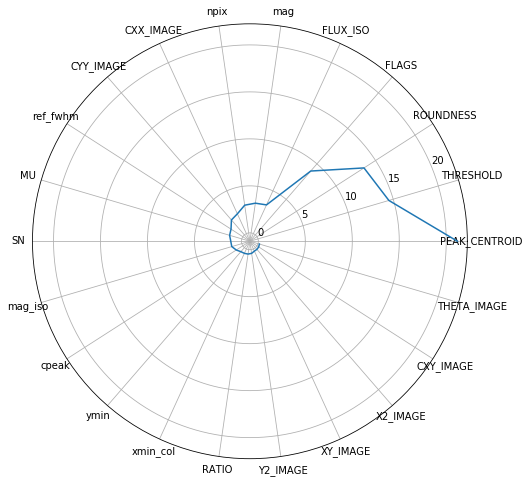

In [11]:
plt.figure(figsize=(8,8))
plt.subplot(111, projection='polar')
plt.plot(angles, imp)
plt.xticks(angles, names)
plt.show()

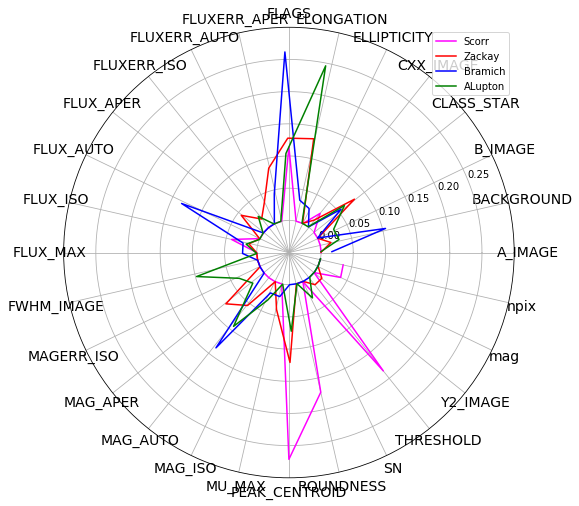

In [95]:
nf=0.90
plt.figure(figsize=(8,8))
plt.subplot(111, projection='polar')

counts = franking(sps_rfsigs, sps=True)
c_s = counts.sort_values(ascending=False)
c_s = (c_s-np.min(c_s.values))/(np.max(c_s.values)-np.min(c_s.values)) #.plot.barh(title='Zackay')
c_s = c_s/c_s.fillna(0).sum()
parcs = np.array([c_s.iloc[:i+1].sum() for i in range(len(c_s))])
c_s = c_s.iloc[parcs<nf]

c_o = franking(ois_rfsigs).sort_values(ascending=False)
c_o = (c_o-np.min(c_o.values))/(np.max(c_o.values)-np.min(c_o.values)) #.plot.barh(title='Zackay')
c_o = c_o/c_o.fillna(0).sum()
parcs = np.array([c_o.iloc[:i+1].sum() for i in range(len(c_o))])
c_o = c_o.iloc[parcs<nf]

c_z = franking(zps_rfsigs).sort_values(ascending=False)
c_z = (c_z-np.min(c_z.values))/(np.max(c_z.values)-np.min(c_z.values)) #.plot.barh(title='Zackay')
c_z = c_z/c_z.fillna(0).sum()
parcs = np.array([c_z.iloc[:i+1].sum() for i in range(len(c_z))])
c_z = c_z.iloc[parcs<nf]

c_h = franking(hot_rfsigs).sort_values(ascending=False)
c_h = (c_h-np.min(c_h.values))/(np.max(c_h.values)-np.min(c_h.values)) #.plot.barh(title='Zackay')
c_h = c_h/c_h.fillna(0).sum()
parcs = np.array([c_h.iloc[:i+1].sum() for i in range(len(c_h))])
c_h = c_h.iloc[parcs<nf]

names = np.unique(list(c_s.index)+list(c_z.index)+list(c_o.index)+list(c_h.index))
c_s = c_s.reindex(names)
c_h = c_h.reindex(names)
c_o = c_o.reindex(names)
c_z = c_z.reindex(names)

angles = np.arange(0, 2*np.pi, 2*np.pi/len(names))

#norm = np.max(np.array([c_s.fillna(0).values, c_z.fillna(0).values, 
#                        c_h.fillna(0).values, c_o.fillna(0).values]).flatten())

plt.plot(angles, c_s.fillna(0).values, color='magenta', label='Scorr')
plt.plot(angles+0.01, c_z.fillna(0).values, color='red',label='Zackay')
plt.plot(angles+0.02, c_o.fillna(0).values, color='blue',label='Bramich')
plt.plot(angles+0.03, c_h.fillna(0).values, color='green',label='ALupton')

plt.legend(loc='best')
plt.xticks(angles, names, fontsize=14)
plt.ylim(-0.05, 0.30)
plt.yticks(np.arange(0, 0.3, .05))
plt.tight_layout()
plt.savefig('radial_feature_importance_rforest.pdf', format='pdf')

### For KNN

In [7]:
zps_knsigs = load('./plots/new_ml_zps_parallel/knn_fsel_zps.joblib')
ois_knsigs = load('./plots/new_ml_ois_parallel/knn_fsel_ois.joblib')
sps_knsigs = load('./plots/new_ml_sps_parallel/knn_fsel_sps.joblib')
hot_knsigs = load('./plots/new_ml_hot_parallel/knn_fsel_hot.joblib')

In [8]:
zps_knscores = load('./plots/new_ml_zps_parallel/knn_fsel_scores_zps.joblib')
ois_knscores = load('./plots/new_ml_ois_parallel/knn_fsel_scores_ois.joblib')
sps_knscores = load('./plots/new_ml_sps_parallel/knn_fsel_scores_sps.joblib')
hot_knscores = load('./plots/new_ml_hot_parallel/knn_fsel_scores_hot.joblib')

In [9]:
np.unique(zps_knscores[0].index)

array(['A_IMAGE', 'BACKGROUND', 'B_IMAGE', 'CLASS_STAR', 'CXX_IMAGE',
       'CXY_IMAGE', 'CYY_IMAGE', 'DELTAX', 'DELTAY', 'ELLIPTICITY',
       'ELONGATION', 'FLAGS', 'FLUXERR_APER', 'FLUXERR_AUTO',
       'FLUXERR_ISO', 'FLUX_APER', 'FLUX_AUTO', 'FLUX_ISO', 'FLUX_MAX',
       'FWHM_IMAGE', 'MAGERR_APER', 'MAGERR_AUTO', 'MAGERR_ISO',
       'MAG_APER', 'MAG_AUTO', 'MAG_ISO', 'MU', 'MU_MAX', 'MU_THRESHOLD',
       'PEAK_CENTROID', 'RATIO', 'ROUNDNESS', 'SN', 'SNR_WIN',
       'THETA_IMAGE', 'THRESHOLD', 'VALID_MAG', 'VALID_MAG_iso',
       'X2_IMAGE', 'XMAX_IMAGE', 'XMIN_IMAGE', 'XPEAK_IMAGE', 'XY_IMAGE',
       'X_IMAGE', 'Y2_IMAGE', 'YMAX_IMAGE', 'YMIN_IMAGE', 'YPEAK_IMAGE',
       'Y_IMAGE', 'mag', 'mag_iso', 'mean_goyet', 'mean_goyet_iso',
       'mean_offset', 'mean_offset_iso', 'new_back_sbright', 'px_scale',
       'ref_back_sbright', 'ref_fwhm', 'slope', 'slope_iso'], dtype=object)

In [10]:
t1 = zps_knscores[0]

In [11]:
t1.loc['MAG_ISO'].values[0]

0.10599916267548412

In [12]:
def franking(fsel, fscores):
    #sels = list(itertools.chain(*fsel))
    #print(sels)
    counts = pd.Series(np.zeros(len(np.unique(fscores[0].index))), 
                       index=np.unique(fscores[0].index), dtype=int)
    for i in range(27):
        sels = fsel[i]
        scores = fscores[i]
        for asel in sels:
            
            counts[asel] += scores.loc[asel].values[0]
            
    return counts

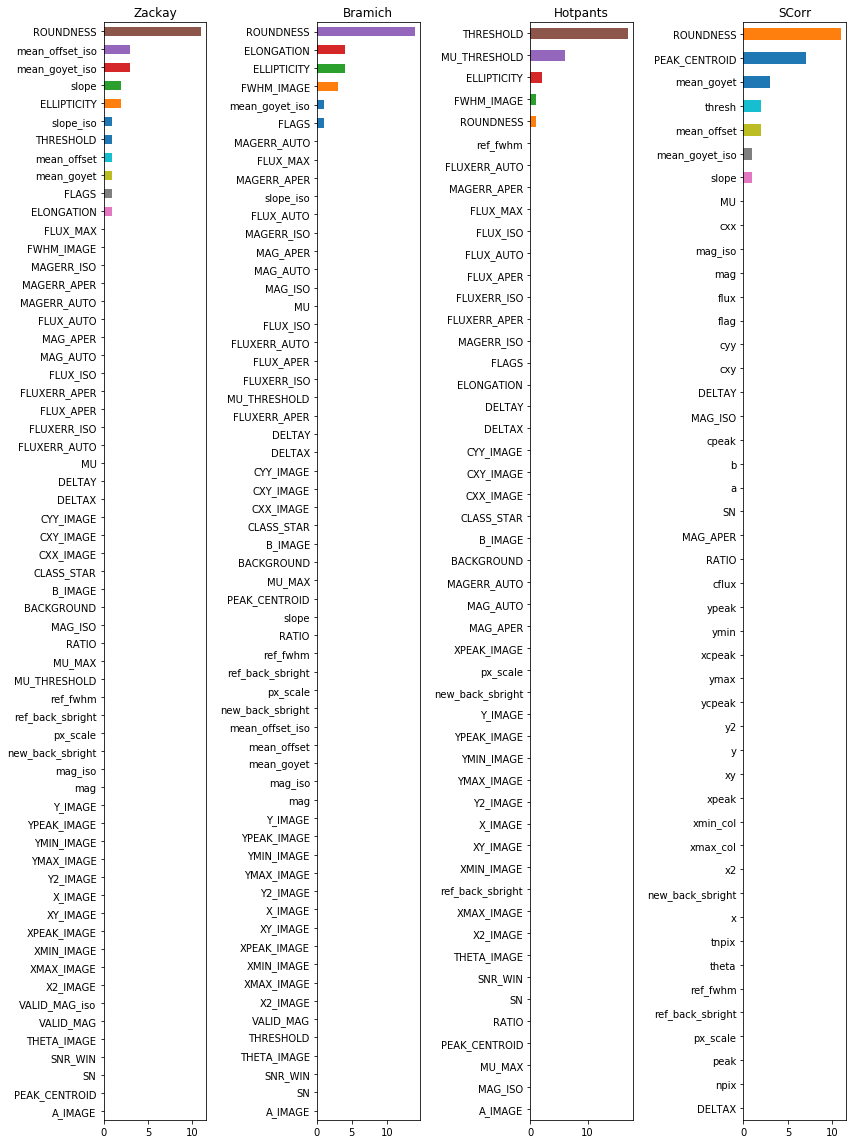

In [13]:
plt.figure(figsize=(12, 16))
plt.subplot(141)
counts = franking(zps_knsigs, zps_knscores)
counts.sort_values().plot.barh(title='Zackay')

plt.subplot(142)
counts = franking(ois_knsigs, ois_knscores)
counts.sort_values().plot.barh(title='Bramich')

plt.subplot(143)
counts = franking(hot_knsigs, hot_knscores)
counts.sort_values().plot.barh(title='Hotpants')

plt.subplot(144)
counts = franking(sps_knsigs, sps_knscores)
counts.sort_values().plot.barh(title='SCorr')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ranking_knn.png')

### For SVM

In [14]:
zps_knsigs = load('./plots/new_ml_zps_parallel/svm_fsel_zps.joblib')
ois_knsigs = load('./plots/new_ml_ois_parallel/svm_fsel_ois.joblib')
sps_knsigs = load('./plots/new_ml_sps_parallel/svm_fsel_sps.joblib')
hot_knsigs = load('./plots/new_ml_hot_parallel/svm_fsel_hot.joblib')

In [15]:
zps_knscores = load('./plots/new_ml_zps_parallel/svm_fsel_ranking_zps.joblib')
ois_knscores = load('./plots/new_ml_ois_parallel/svm_fsel_ranking_ois.joblib')
sps_knscores = load('./plots/new_ml_sps_parallel/svm_fsel_ranking_sps.joblib')
hot_knscores = load('./plots/new_ml_hot_parallel/svm_fsel_ranking_hot.joblib')

In [48]:
def franking(fsel, fscores):
    #sels = list(itertools.chain(*fsel))
    #print(sels)
    counts = pd.DataFrame(np.zeros(len(np.unique(fscores[0][0]))), 
                       index=np.unique(fscores[0][0]), dtype=int)
    for i in range(27):
        sels = fsel[i]
        scores = pd.DataFrame(np.array(fscores[i]).T, 
                              columns=['features', 'rank', 'score'])
        for asel in sels:
            #import ipdb; ipdb.set_trace()
            counts.loc[asel] += scores.loc[scores['features']==asel].score.values[0]
            
    return counts/27.

In [44]:
zps_knsigs[0][0]

'FLUX_ISO'

In [45]:
t1 = pd.DataFrame(np.array(zps_knscores[0]).T, columns=['features', 'rank', 'score'])

In [46]:
t1.loc[t1['features']==zps_knsigs[0][0]].score.values[0]

0.7075658381462264

In [55]:
counts = franking(zps_knsigs, zps_knscores)

In [52]:
counts = franking(sps_knsigs, sps_knscores)

In [53]:
counts = franking(ois_knsigs, ois_knscores)

In [54]:
counts = franking(hot_knsigs, hot_knscores)

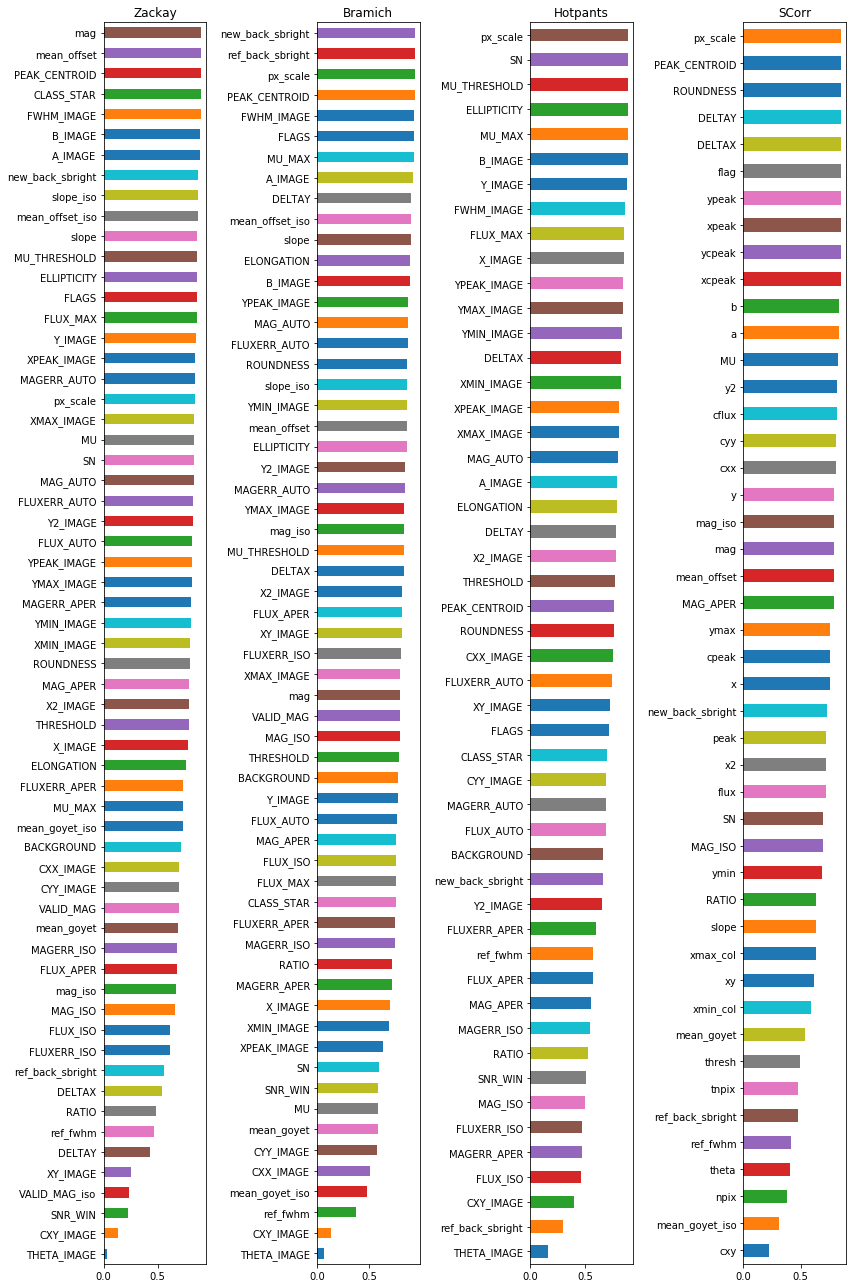

In [62]:
plt.figure(figsize=(12,18))
plt.subplot(141)
counts = franking(zps_knsigs, zps_knscores)[0]
counts.sort_values().plot.barh(title='Zackay')

plt.subplot(142)
counts = franking(ois_knsigs, ois_knscores)[0]
counts.sort_values().plot.barh(title='Bramich')

plt.subplot(143)
counts = franking(hot_knsigs, hot_knscores)[0]
counts.sort_values().plot.barh(title='Hotpants')

plt.subplot(144)
counts = franking(sps_knsigs, sps_knscores)[0]
counts.sort_values().plot.barh(title='SCorr')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ranking_svm.png')